**Bike Sharing Dataset from UCI: *https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset***

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import warnings
from scipy.stats import norm, skew #for some statistics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import IsolationForest

warnings.filterwarnings("ignore")


In [380]:
day = pd.read_csv("Bike-Sharing-Dataset/day.csv", index_col=0) 
hours = pd.read_csv("Bike-Sharing-Dataset/hour.csv",index_col=0)

In [381]:
df_day = day.copy()
df_hours = hours.copy()

In [382]:
df_day.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [383]:
df_hours.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [384]:
def info_df(df):
    print("Type of features: ")
    df.info()
    print("\n")
    
    print(f"Number of duplicated rows: {df.duplicated().sum()}")
    print(f"Number of null values: {df.isnull().sum().sum()}")
    
    

    

In [385]:
info_df(df_day)

Type of features: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 731
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.4+ KB


Number of duplicated rows: 0
Number of null values: 0


In [386]:
info_df(df_hours)

Type of features: 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


Number of duplicated rows: 0
Number of null values: 0


In [387]:
def drop_output(df_d = df_day,df_h=df_hours):
    df_d['dteday'] = pd.to_datetime(df_d['dteday'])
    df_h['dteday'] = pd.to_datetime(df_h['dteday'])
    df_d.index = df_d['dteday']
    df_h.index = df_h['dteday']
    df_day_y = df_d['cnt'].copy()
    df_hours_y = df_h['cnt'].copy()
    return df_day_y, df_hours_y

In [388]:
def processing_variable(df_day, df_hours):
    cat = ['season',
       'workingday',
       'weathersit',
       'weekday',
       'holiday',
       'mnth',
       'yr'
       ]
    
    
    for col in cat:
        df_day[col] = df_day[col].astype('category')
        df_hours[col] = df_hours[col].astype('category')


    df_day['dteday'] = pd.to_datetime(df_day['dteday'])
    df_hours['dteday'] = pd.to_datetime(df_hours['dteday'])

    df_hours['hr'] = df_hours['hr'].astype('category')

    return df_day, df_hours

In [389]:
df_day, df_hours = processing_variable(df_day, df_hours) 

In [390]:
df_day.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [391]:
df_day

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341


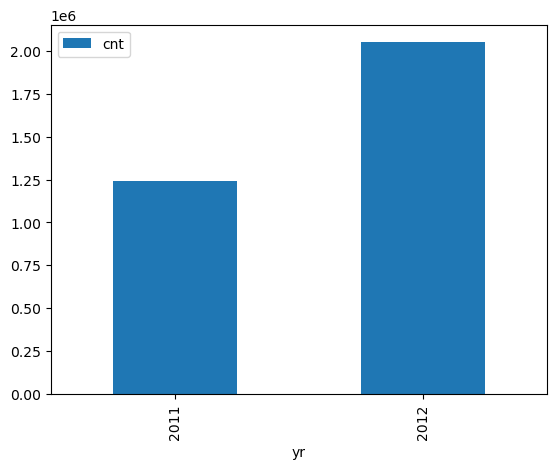

In [392]:
map_dict = {0:2011, 1:"2012"}
df_copy = df_day.copy()
df_copy['yr'] = df_copy['yr'].map(map_dict)

(df_copy
    .groupby('yr')['cnt']
    .sum()
    .to_frame()
    .plot
    .bar()
)
plt.show()

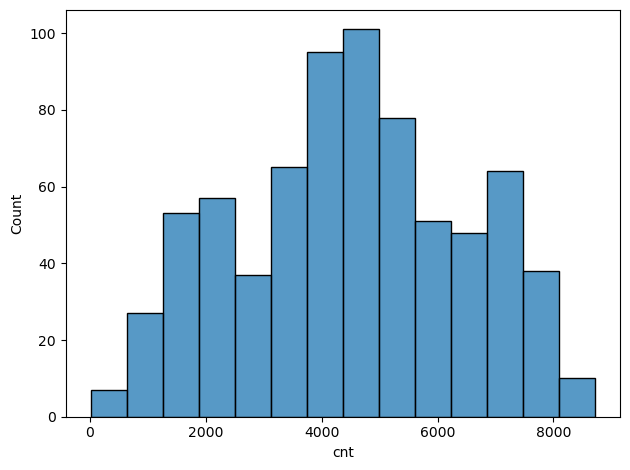

In [393]:
sns.histplot(df_copy['cnt']);
plt.grid(False)
plt.tight_layout()

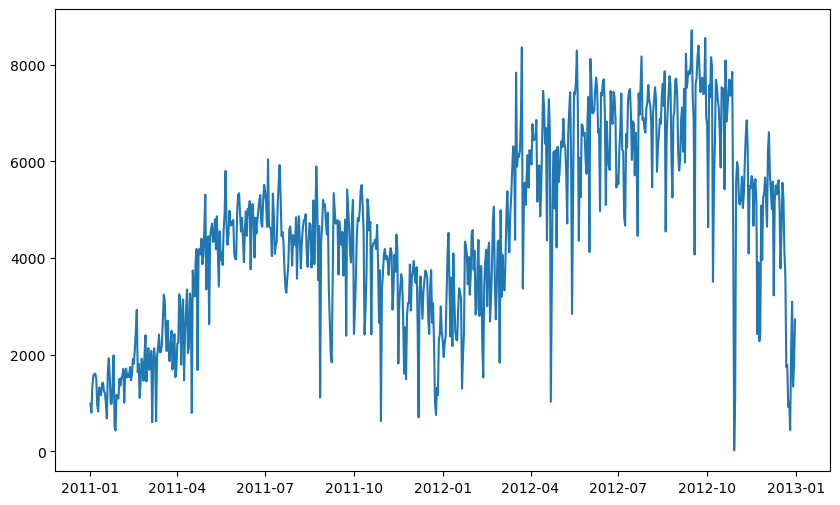

In [394]:
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(df_day['dteday'],df_day['cnt'])

plt.show()

**Rent per month between in 2011-2012**

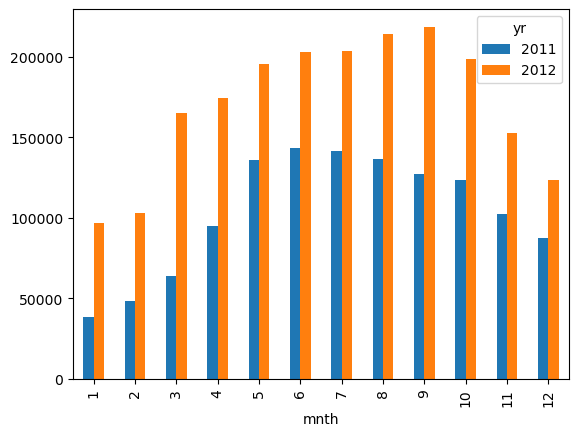

In [395]:
(df_copy
    .groupby(['yr','mnth'])['cnt']
    .sum()
    .unstack(level = 0)
    .plot
    .bar()
)
plt.show()

**Number of rents according to the weather**

**Legend**

1: Clear, Few clouds, Partly cloudy, Partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

Note that the number of the bike rent is due to the weather condition labelled by 3


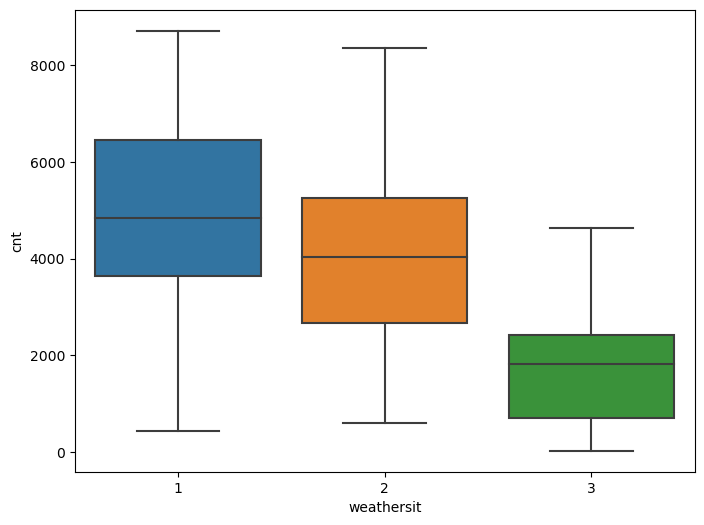

In [396]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x = 'weathersit', y = 'cnt', data=df_day)
plt.show()

**Behavior of the counted rents according to the month**

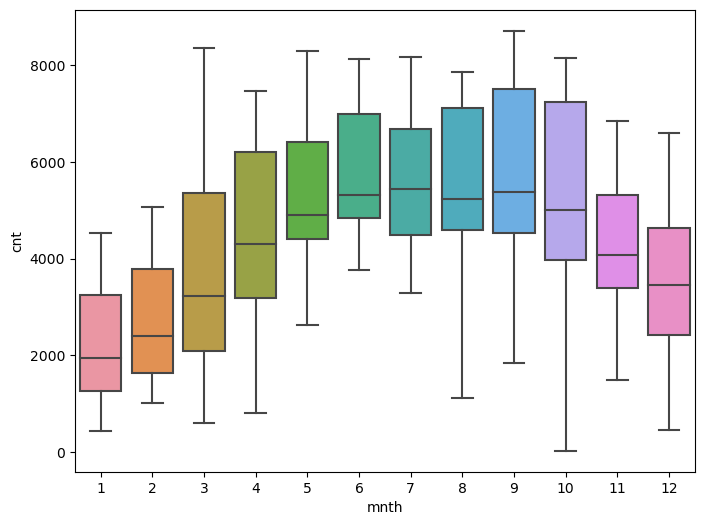

In [397]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(x = 'mnth', y = 'cnt', data=df_day)
plt.show()

Note that june, july and august are increase the bike rent because of the summer time.

**Verify if there are outliers**

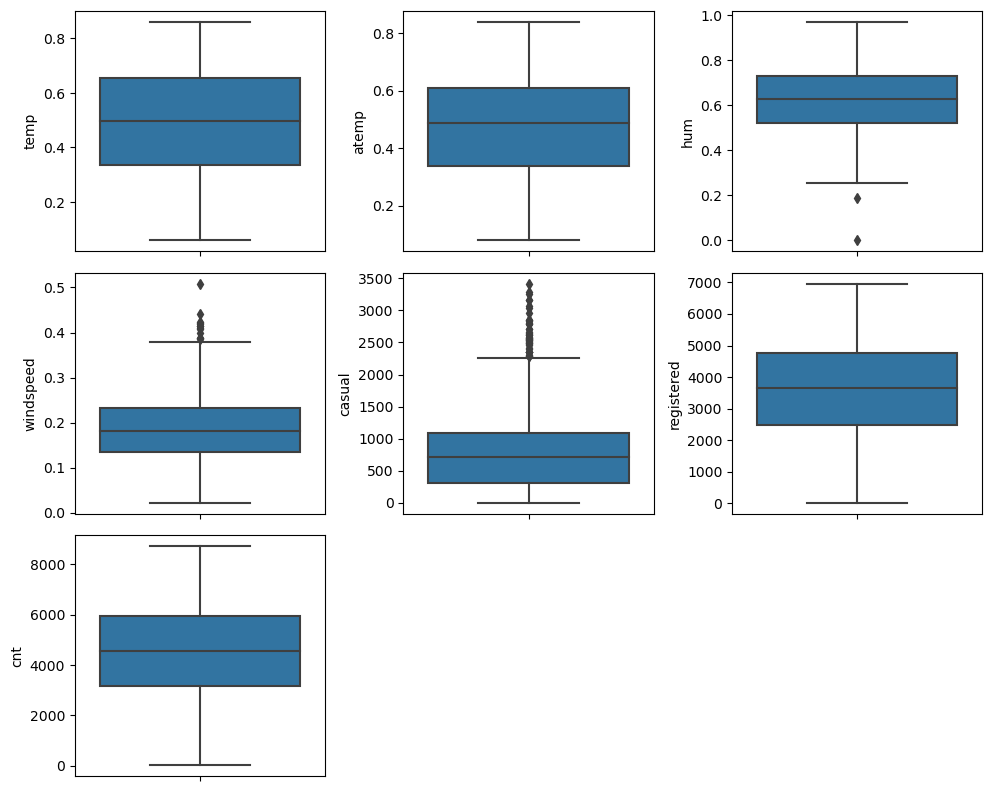

In [398]:
col_num = ['temp', 
           'atemp',
           'hum',
           'windspeed',
           'casual',
           'registered',
           'cnt'
          ]


fig = plt.figure(figsize=(10,8))
index = 1
for col in col_num:
    plt.subplot(3,3,index)
    sns.boxplot(y = col, data = df_day)
    index = index + 1
fig.tight_layout(pad=1.0)

**Behavior along different stages of the year**

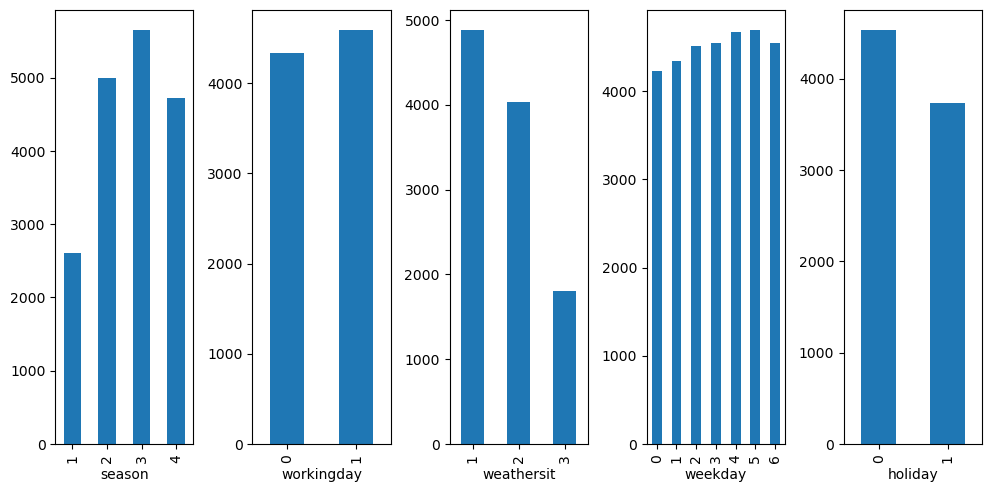

In [399]:
cats = ['season',
       'workingday',
       'weathersit',
       'weekday',
       'holiday',
      ]  

fig, axs = plt.subplots(1,5,figsize = (10,5))

index = 0
for cat in cats:
    # 
    (df_day
        .groupby([cat])['cnt']
        .mean()
        .plot(kind='bar', ax = axs[index])
        )
    index = index+1
    
    plt.xticks(rotation=90)
fig.tight_layout(pad=1.0)

**Casual, registered and counted per month**

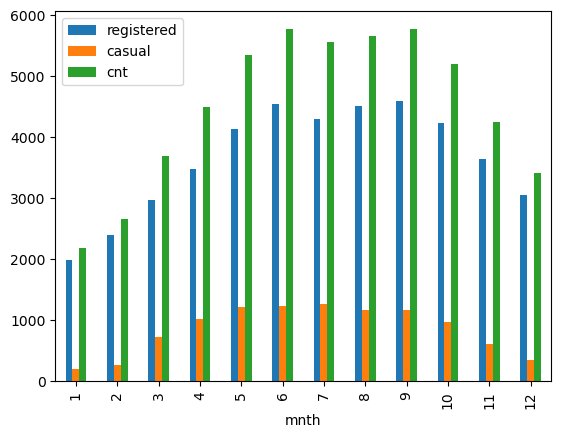

In [400]:
(df_day.
    groupby('mnth')[['registered','casual','cnt']]
    .mean()
    .plot
    .bar()
)
plt.show()

**Rent per weekday in a month**

Note that at the end of the year the number of bike rent decreases due to the weather. In addition December and January present minimun values due to the celebrations of the new year.

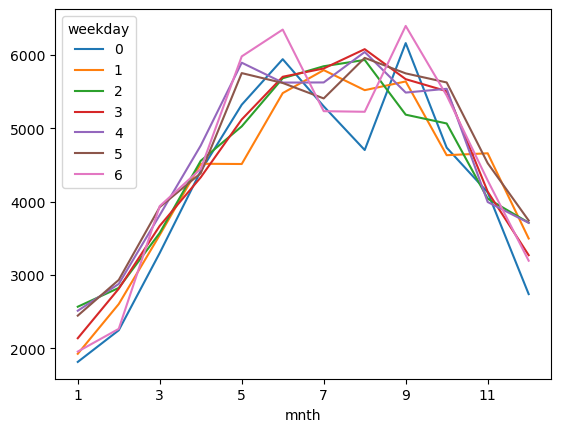

In [401]:
(df_day
    .groupby(['mnth','weekday'])['cnt']
    .mean()
    .unstack(level=1)
    .plot()
)
plt.show()

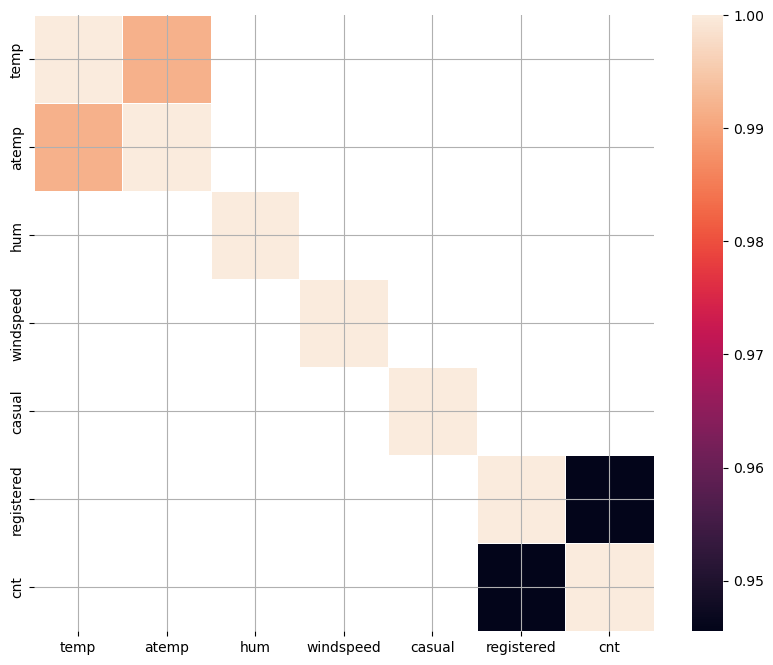

In [402]:
plt.figure(figsize=(10,8))
correlation = df_day.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5)
plt.grid()

**Output correlation *cnt* with the other features**

In [403]:
(correlation['cnt']
    .abs()
    .sort_values(ascending=False)
    .iloc[1:]
)

registered    0.945517
casual        0.672804
atemp         0.631066
temp          0.627494
windspeed     0.234545
hum           0.100659
Name: cnt, dtype: float64

**Find collinearity**

In [404]:
upper_tri = correlation.where(np.triu(np.ones(correlation.shape),k=1).astype(np.bool),0)

(upper_tri
    .gt(.8)
    .stack()
    .loc[lambda x:x]
    .index.to_list()
)

[('temp', 'atemp'), ('registered', 'cnt')]

In [405]:
upper_tri

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,0.0,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.0,0.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.0,0.000000,0.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,0.0,0.000000,0.000000,0.000000,-0.167613,-0.217449,-0.234545
casual,0.0,0.000000,0.000000,0.000000,0.000000,0.395282,0.672804
registered,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.945517
cnt,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Avoid collinearity**

In [406]:
to_drop_day = []
for col in df_day.columns:
    mode = df_day[col].value_counts(ascending=False).iloc[0]
    ratio = mode/df_day.shape[0]
    if ratio>0.96:
        to_drop_day.append(col)

to_drop_hour= []
for col in df_hours.columns:
    mode = df_hours[col].value_counts(ascending=False).iloc[0]
    ratio = mode/df_hours.shape[0]
    if ratio>0.96:
        to_drop_hour.append(col)

df_hours.drop(to_drop_hour, axis=1,inplace=True)
df_day.drop(to_drop_day, axis=1,inplace=True)

In [407]:
df_day.drop('atemp', axis=1,inplace=True)
df_hours.drop('atemp', axis=1,inplace=True)

In [408]:
df_day

,dteday,season,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,
1,2011-01-01,1,0,1,6,0,2,0.344167,0.805833,0.160446,331,654,985
2,2011-01-02,1,0,1,0,0,2,0.363478,0.696087,0.248539,131,670,801
3,2011-01-03,1,0,1,1,1,1,0.196364,0.437273,0.248309,120,1229,1349
4,2011-01-04,1,0,1,2,1,1,0.200000,0.590435,0.160296,108,1454,1562
5,2011-01-05,1,0,1,3,1,1,0.226957,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2012-12-27,1,1,12,4,1,2,0.254167,0.652917,0.350133,247,1867,2114
728,2012-12-28,1,1,12,5,1,2,0.253333,0.590000,0.155471,644,2451,3095
729,2012-12-29,1,1,12,6,0,2,0.253333,0.752917,0.124383,159,1182,1341


**To determine the skewness of the features and to remove it**

In [409]:
def skewness_remove_df(df):
    df = df.copy()
    col_num = (df
                .select_dtypes(include = np.number)
                .columns
                )

    numeric_feature = (df[col_num]
                        .apply(lambda x: np.abs(skew(x)))
                        .sort_values(ascending=False)
                        )
    skewness = pd.DataFrame(numeric_feature,columns=['Skew'])
    mask = skewness['Skew'] > 0.75
    skewness_col = list(skewness[mask]
                            .index
                            .values
                )
        
    if 'cnt' in skewness_col:
        skewness_col.remove('cnt')

    df[skewness_col] = np.log1p(df[skewness_col])

    return df

    


In [410]:
df_day_norm, df_hours_norm = skewness_remove_df(df_day),skewness_remove_df(df_hours)

In [411]:
df_day_norm = df_day_norm.set_index('dteday')
df_hours_norm = df_hours_norm.set_index('dteday')

In [412]:
df_day_y,df_hours_y = drop_output()

**Encoding and Scaling categorical and numerical data respectively**

In [413]:
def encoding_data(df,output):
    cat_col = (df
                  .select_dtypes(include='category')
                  .columns
            )
    
    num_col = (df
                  .select_dtypes(exclude='category')
                  .columns
            )

    ohe = OneHotEncoder(sparse = False,drop = 'first')
    tf_cat_col = ohe.fit_transform(df[cat_col])
    scaler = StandardScaler() 
    tf_num = scaler.fit_transform(df[num_col])
    X_train_transformed = np.concatenate([tf_num,tf_cat_col], axis=1)
    y = output.values
    return X_train_transformed,y

In [414]:
X_train_transformed,y = encoding_data(df_day_norm,df_day_y)

**Split manually the dataset into train and test because we deal with a time serie**

In [415]:
def train_test_split_f(X,y):
    limit = int(0.7*X.shape[0])
    X_train = X[:limit]
    y_train = y[:limit]
    X_test = X[limit:]
    y_test = y[limit:]
    
    print(f"{X_train.shape,X_test.shape,y_train.shape,y_test.shape}")
    
    return X_train,X_test,y_train,y_test

**Create an object Ridge**

**Train the data**

In [416]:
X_train,X_test,y_train,y_test = train_test_split_f(X_train_transformed,y)
lr = Ridge()
lr.fit(X_train,y_train)

((511, 30), (220, 30), (511,), (220,))


Ridge()

**Working with test values**

In [417]:
y_test_pred = lr.predict(X_test) 
rmse_lr = mean_squared_error(y_test, y_test_pred, squared = False) 
r2_lr = r2_score(y_test,y_test_pred)
print(f"Mean squared error: {rmse_lr}") 
print(f"R2: {r2_lr}")

Mean squared error: 30.850528446270257
R2: 0.9996509897618191


**Anomaly detection**

Hampel_filter is use in order to detect the anomaly detection

In [418]:
def hampel_filter_forloop(df:pd.Series, window_size:int, n_sigma = 3):
    n = len(df)
    new_series = df.copy()
    k = 1.4826
    indice = []
    
    for i in range(window_size, n-window_size):
         x0 = np.median(new_series.iloc[i-window_size:i+window_size])
         s0 = k*np.median(np.abs(new_series.iloc[i-window_size:i+window_size] - x0))

         if( np.abs(df[i]-x0)  > n_sigma*s0 ):
            indice.append(i)
    return indice



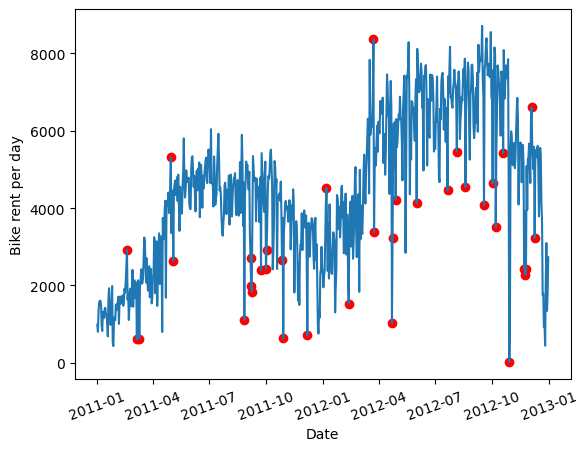

In [419]:
detected_outlier = hampel_filter_forloop(df_day['cnt'],10)
df_outlier = df_day['cnt'].iloc[detected_outlier]

plt.plot(df_day['cnt'])
plt.scatter(df_outlier.index,df_outlier, c='r')
plt.xticks(rotation=20)
plt.xlabel("Date")
plt.ylabel("Bike rent per day")
plt.show()

**A dataframe with the predicted and the test values** 

In [420]:
y_pred = lr.predict(X_test) 
df_y_pred = pd.DataFrame(data=y_pred, 
                        index= df_day_y.iloc[-len(y_pred):].index, 
                        columns=['pred']
                        )

df_y_pred = pd.concat([df_y_pred, df_day_y.iloc[-len(y_pred):] ], axis=1)
df_y_pred.head(5)

,pred,cnt
dteday,,
2012-05-26,6460.266120,6536
2012-05-27,6479.531699,6591
2012-05-28,5972.987641,6043
2012-05-29,5751.161213,5743
2012-05-30,6875.891653,6855


**Hours**

**Bike rent by hour per weekday**

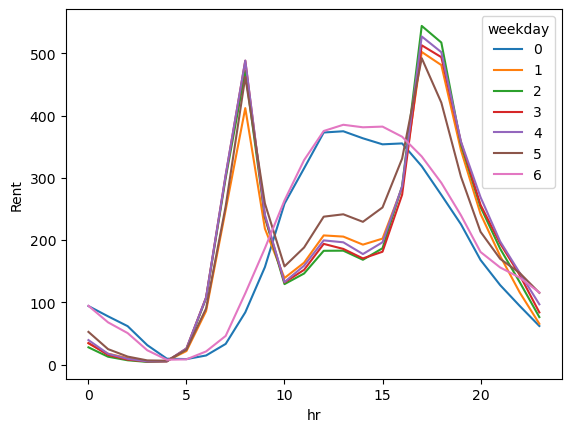

In [421]:
(df_hours
    .groupby(['weekday','hr'])['cnt']
    .mean()
    .unstack(level=0)
    .plot(ylabel='Rent')
)
plt.show()

#The peak values can be observed during the workdays because people rent bike to go to the work and when returning from it 
# During weekend, the demand high between 10:00 am and 1:00 pm because people rent a bike to take a ride.

In [ ]:
(df_hours.
    groupby('mnth')[['registered','casual','cnt']]
    .mean()
    .plot
    .bar()
)
plt.show()

In [237]:
X_train_transformed,y = encoding_data(df_hours_norm,df_hours_y)

In [238]:
X_train,X_test,y_train,y_test = train_test_split_f(X_train_transformed,y)

((12165, 54), (5214, 54), (12165,), (5214,))


In [239]:
lr_r = Ridge()
lr_r.fit(X_train,y_train)
y_test_pred = lr_r.predict(X_test) 
rmse = mean_squared_error(y_test, y_test_pred, squared = False) 
r2 = r2_score(y_test,y_test_pred)
print(rmse) 
print(r2)

0.07066711518770563
0.9999998971731254


In [240]:
y_pred = lr_r.predict(X_test) 
df_y_pred = pd.DataFrame(data=y_pred, index= df_hours_y.iloc[-len(y_pred):].index, columns=['pred'])
df_y_pred = pd.concat([df_y_pred, df_hours_y.iloc[-len(X_test):] ], axis=1)
df_y_pred.head(10)

,pred,cnt
dteday,,
2012-05-27,61.087463,61
2012-05-27,36.094345,36
2012-05-27,11.056461,11
2012-05-27,7.002639,7
2012-05-27,22.025351,22
2012-05-27,52.069597,52
2012-05-27,151.112317,151
2012-05-27,270.007556,270
2012-05-27,423.922833,424


<Figure size 2000x500 with 0 Axes>

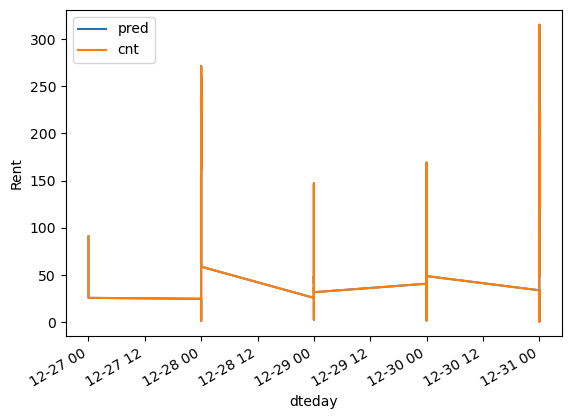

In [241]:
plt.figure(figsize=(20,5))
df_y_pred.iloc[-100:].plot(ylabel = 'Rent')
plt.show()